In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from collections import Counter

#### 1. Hiển thị toàn bộ dữ liệu

In [ ]:
df = pd.read_csv('P4AI_BT1.csv')
df

#### 2. Điền các giá trị bị thiếu của dữ liệu theo phương pháp trung bình với các trường có giá trị số và theo phương pháp tần số cao nhất với giá trị rời rạc

In [22]:
#Find the most frequency value of df1['variety']
def most_frequent(List):
	occurence_count = Counter(List)
	return occurence_count.most_common(1)[0][0]

In [23]:
df1 = df.copy()
Counter(df1['variety'])
df1['sepal.length'].fillna(round(df['sepal.length'].mean()), inplace = True)
df1['sepal.width'].fillna(round(df['sepal.width'].mean()), inplace = True)
df1['petal.length'].fillna(round(df['petal.length'].mean()), inplace = True)
df1['petal.width'].fillna(round(df['sepal.width'].mean()), inplace = True)
df1['variety'].fillna(most_frequent(df1['variety']), inplace = True)
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,4.0,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,3.0,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,3.0,5.0,1.9,Virginica
147,6.0,3.0,5.2,2.0,Virginica
148,6.0,3.4,4.0,2.3,Virginica


#### 3. Hiển thị các bản ghi có sepal.length > 5 và sepal.width > 3

In [24]:
df2 = df1.copy()

In [25]:
df2[(df2['sepal.length'] > 5) & (df2['sepal.width'] > 3)].reset_index()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,5,5.4,3.9,1.7,0.4,Setosa
2,6,6.0,3.4,1.4,0.3,Setosa
3,7,6.0,3.4,1.5,0.2,Setosa
4,10,5.4,3.7,1.5,0.2,Setosa
5,15,5.7,4.4,1.5,3.0,Setosa
6,16,5.4,3.9,1.3,0.4,Setosa
7,17,5.1,3.5,1.4,0.3,Virginica
8,18,5.7,3.8,1.7,3.0,Setosa
9,19,5.1,3.8,1.5,0.3,Setosa


#### 4. Chuẩn hóa dữ liệu theo min max

In [26]:
df3 = df2.copy()

In [27]:
sepal_length_min = min(df3['sepal.length'])
sepal_length_max = max(df3['sepal.length'])
sepal_width_min = min(df3['sepal.width'])
sepal_width_max = max(df3['sepal.width'])
petal_length_min = min(df3['petal.length'])
petal_length_max = max(df3['petal.length'])
petal_width_min = min(df3['petal.width'])
petal_width_max = max(df3['petal.width'])


In [28]:
df3['sepal.length'] = (df3['sepal.length'] - sepal_length_min) / (sepal_length_max - sepal_length_min)
df3['sepal.width'] = (df3['sepal.width'] - sepal_width_min) / (sepal_width_max - sepal_width_min)
df3['petal.length'] = (df3['petal.length'] - petal_length_min) / (petal_length_max - petal_length_min)
df3['petal.width'] = (df3['petal.width'] - petal_width_min) / (petal_width_max - petal_width_min)
df3

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.034483,Setosa
1,0.166667,0.416667,0.508475,0.034483,Setosa
2,0.111111,0.500000,0.050847,0.034483,Setosa
3,0.083333,0.458333,0.084746,1.000000,Setosa
4,0.194444,0.666667,0.067797,0.034483,Setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.758621,Virginica
146,0.555556,0.416667,0.677966,0.620690,Virginica
147,0.472222,0.416667,0.711864,0.655172,Virginica
148,0.472222,0.583333,0.508475,0.758621,Virginica


#### 5. Liên tục hóa thuộc tính variety

In [29]:
df4 = df3.copy()

In [30]:
df4['variety'].replace({"Setosa" : 0, "Virginica" : 1, "Versicolor" : 2}, inplace = True)
df4

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.034483,0
1,0.166667,0.416667,0.508475,0.034483,0
2,0.111111,0.500000,0.050847,0.034483,0
3,0.083333,0.458333,0.084746,1.000000,0
4,0.194444,0.666667,0.067797,0.034483,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.758621,1
146,0.555556,0.416667,0.677966,0.620690,1
147,0.472222,0.416667,0.711864,0.655172,1
148,0.472222,0.583333,0.508475,0.758621,1


#### 6. Xây dựng mô hình hồi quy tuyến tính để đoán kết quả của thuộc tính variety  dựa trên các thuộc tính khác

In [31]:
df5 = df4.copy()

In [32]:
X = df5.drop("variety", axis = 1)
y = df5['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# print(y_test)


In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Predicted label: {}".format(predict))
print("True label: {} ".format(y_test.values))
accuracy = model.score(X_test, y_test)
print("Accuracy : {} %".format(accuracy * 100))

Predicted label: [1 0 0 1 1 2 1 1 1 2 1 1 1 1 0 1 1 1 2 1 2 2 1 0 1 1 1 0 0 0]
True label: [1 0 0 0 1 2 2 2 2 2 2 1 2 2 0 2 2 1 2 1 2 0 2 0 1 2 2 0 0 0] 
Accuracy : 56.666666666666664 %


#### 7. Lấy mẫu ngẫu nhiên có lặp lại 50% dữ liệu

In [34]:
df6 = df5.sample(len(df5) // 2)

In [35]:
df6['sepal.length'] = np.random.choice(df5['sepal.length'], len(df5) // 2, replace = True)
df6['sepal.width'] = np.random.choice(df5['sepal.width'], len(df5) // 2, replace = True)
df6['petal.length'] = np.random.choice(df5['petal.length'], len(df5) // 2, replace = True)
df6['petal.width'] = np.random.choice(df5['petal.width'], len(df5) // 2, replace = True)
df6['variety'] = np.random.choice(df5['variety'], len(df5) // 2, replace = True)
df6

,sepal.length,sepal.width,petal.length,petal.width,variety
141,0.166667,0.416667,0.627119,1.000000,2
57,0.222222,0.625000,0.661017,0.827586,0
58,0.250000,0.583333,0.423729,0.413793,0
114,0.305556,0.625000,0.084746,0.413793,1
33,0.472222,0.500000,0.864407,0.413793,1
...,...,...,...,...,...
12,0.555556,0.416667,0.966102,0.586207,1
69,0.472222,0.291667,0.576271,0.034483,1
145,0.472222,0.625000,0.711864,0.448276,0
66,0.500000,0.083333,0.067797,0.482759,2


#### 8. Rời rạc hóa thuộc tính sepal.length

In [36]:
df7 = df5.copy()
min1 = min(df7['sepal.length'])
max1 = max(df7['sepal.length'])
df7['sepal.length'] = pd.cut(df7['sepal.length'], bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1], labels=["Very Low", "Low", "Medium", "High", "Very High"])
df7

,sepal.length,sepal.width,petal.length,petal.width,variety
0,Low,0.625000,0.067797,0.034483,0
1,Very Low,0.416667,0.508475,0.034483,0
2,Very Low,0.500000,0.050847,0.034483,0
3,Very Low,0.458333,0.084746,1.000000,0
4,Very Low,0.666667,0.067797,0.034483,0
...,...,...,...,...,...
145,High,0.416667,0.711864,0.758621,1
146,Medium,0.416667,0.677966,0.620690,1
147,Medium,0.416667,0.711864,0.655172,1
148,Medium,0.583333,0.508475,0.758621,1


#### 9. Phân cụm dữ liệu và loại bỏ ngoại lai 

In [53]:
df8 = df4.copy()

In [38]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

In [84]:
X = df4.copy()
X = X.values
X_sepal = X[: , 0 : 2]

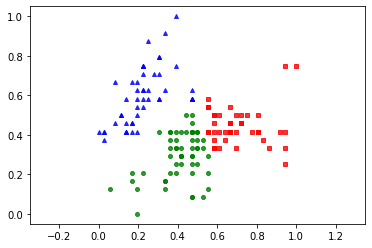

In [85]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X_sepal)
pred_label = kmeans.predict(X_sepal)
pred_label
kmeans_display(X_sepal, pred_label)

In [90]:
Y = df4.copy()
Y = Y.values
Y_petal = Y[: , 2 : 4]

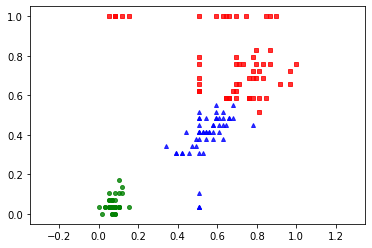

In [91]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(Y_petal)
pred_label1 = kmeans.predict(Y_petal)
pred_label1
kmeans_display(Y_petal, pred_label1)